<a href="https://colab.research.google.com/github/gabriel7268/PRH35.1_UFBA-ANP/blob/main/Reuni%C3%A3o_PRH_09_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orientação PRH 07/05

##Feedbacks Reunião 09/04:
adicionar ruídos no y

y = 2*x + k(ruido)    
valores medidos (ponto) e predicao (linha), com legenda    
modelo nao linear y = c1*x1 + c2x2^2 + k(ruido branco mi=0)    
sistema nao linear:   
              

```
y1 = x1x2 + x2^2 k(ruido branco mi=0)
```

    y2 = x1x2 + x2^3 k(ruido branco u=0)

#### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


### Regressão Linear y = 2x + k (baixo ruido branco)

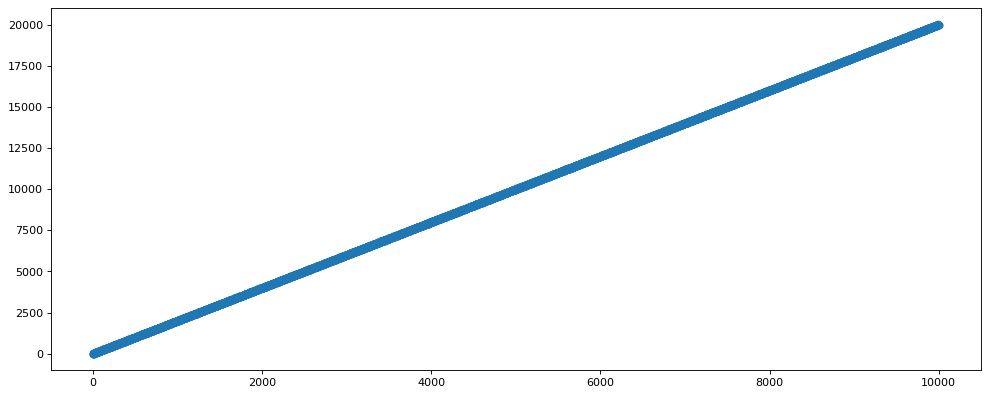

In [123]:
def white_noise(sd, x, m=0):
  k = np.random.normal(m,sd,len(x))
  return k

plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1,10000,1)
y = 2*x + white_noise(10, x)

plt.scatter(x, y)

In [126]:
model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = np.arange(1e6, 1.5e6, 1e4)
y_test = 2*x_test + white_noise(10, x_test)
#print(y_test)

prediction = model.predict(x_test)
#print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

Epoch 1/10
313/313 [==============================] - 1s 930us/step - loss: 10046.3914 - mae: 10046.3914
Epoch 2/10
313/313 [==============================] - 0s 925us/step - loss: 7774.5244 - mae: 7774.5244
Epoch 3/10
313/313 [==============================] - 0s 920us/step - loss: 3117.3188 - mae: 3117.3188
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 396.4596 - mae: 396.4596
Epoch 5/10
313/313 [==============================] - 0s 948us/step - loss: 397.3467 - mae: 397.3467
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 393.3863 - mae: 393.3863
Epoch 7/10
313/313 [==============================] - 0s 951us/step - loss: 396.7687 - mae: 396.7687
Epoch 8/10
313/313 [==============================] - 0s 927us/step - loss: 395.1239 - mae: 395.1239
Epoch 9/10
313/313 [==============================] - 0s 938us/step - loss: 396.2136 - mae: 396.2136
Epoch 10/10
313/313 [==============================] - 0s 898us/step - loss: 396.5886 -

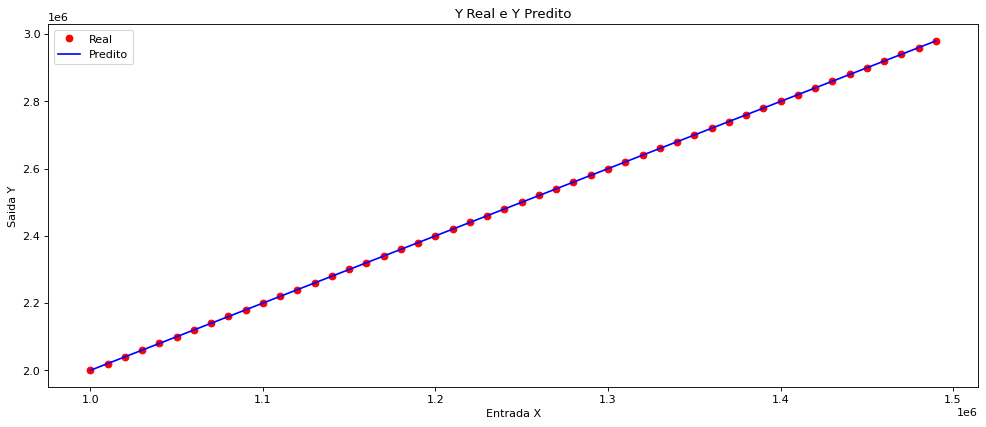

In [127]:
plt.figure(figsize=(15, 6), dpi=80)


#Dados Real, y = 2x
plt.plot(x_test, y_test, 'ro', label = 'Real')
plt.plot(x_test, y_pred,'b-', label = 'Predito')
#Saida Predita
#plt.plot(x_test, y_pred,'b-')
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

Regressão Linear y = 2x + k (médio ruido branco)

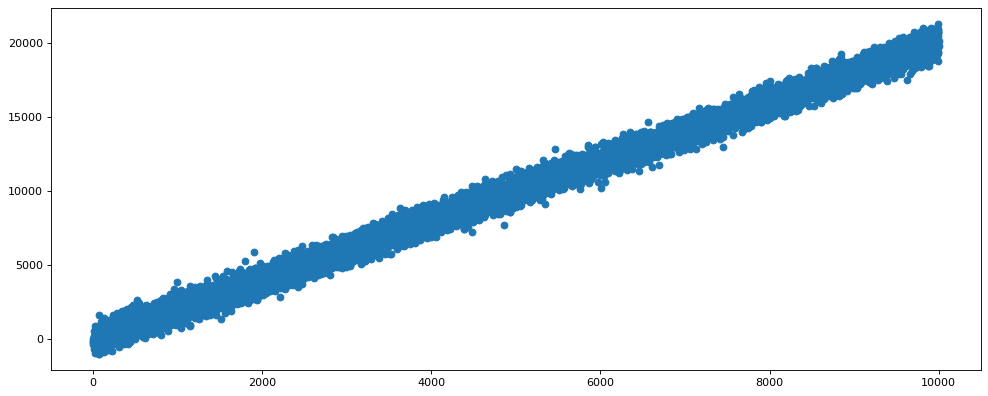

In [157]:
plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1,10000,1)
y = 2*x + white_noise(500, x)

plt.scatter(x, y)

In [153]:
#Função objetivo Min Erro Absoluto

model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = np.arange(1e6, 1.01e6, 1)
y_test = 2*x_test + white_noise(500, x_test)
#print(y_test)

prediction = model.predict(x_test)
#print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

Epoch 1/10
313/313 [==============================] - 1s 956us/step - loss: 955.4852 - mae: 955.4852
Epoch 2/10
313/313 [==============================] - 0s 941us/step - loss: 394.7710 - mae: 394.7710
Epoch 3/10
313/313 [==============================] - 0s 892us/step - loss: 397.9125 - mae: 397.9125
Epoch 4/10
313/313 [==============================] - 0s 934us/step - loss: 402.5620 - mae: 402.5620
Epoch 5/10
313/313 [==============================] - 0s 916us/step - loss: 396.2971 - mae: 396.2971
Epoch 6/10
313/313 [==============================] - 0s 889us/step - loss: 400.5315 - mae: 400.5315
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 400.0575 - mae: 400.0575
Epoch 8/10
313/313 [==============================] - 0s 956us/step - loss: 398.9332 - mae: 398.9332
Epoch 9/10
313/313 [==============================] - 0s 944us/step - loss: 397.7632 - mae: 397.7632
Epoch 10/10
313/313 [==============================] - 0s 903us/step - loss: 396.8130 - mae: 

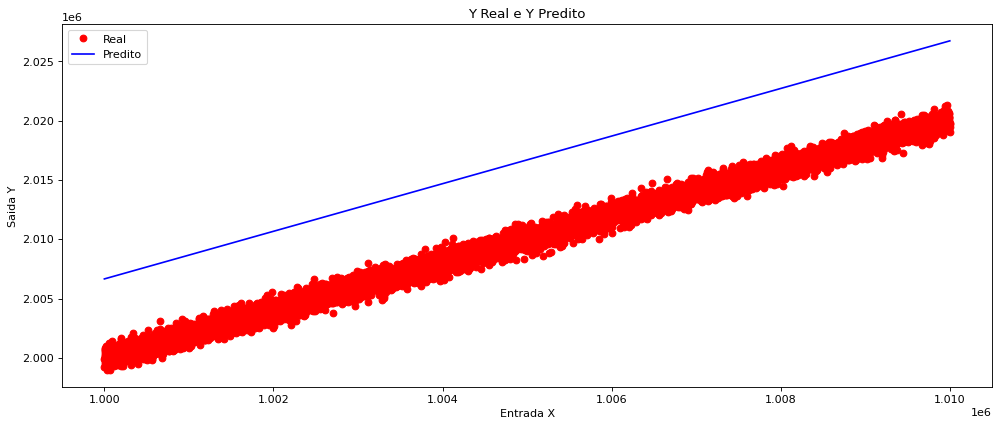

In [154]:
plt.figure(figsize=(15, 6), dpi=80)


#Dados Real
plt.plot(x_test, y_test, 'ro', label = 'Real')
plt.plot(x_test, y_pred,'b-', label = 'Predito')
#Saida Predita
#plt.plot(x_test, y_pred,'b-')
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

In [151]:
#Função objetivo Min Erro Quadrado
model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = np.arange(1e6, 1.01e6, 1)
y_test = 2*x_test + white_noise(500, x_test)
#print(y_test)

prediction = model.predict(x_test)
#print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

Epoch 1/10
313/313 [==============================] - 1s 964us/step - loss: 209470105.3248 - mae: 12508.3232
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 161387364.3567 - mae: 10981.2431
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 139886802.7006 - mae: 10219.0966
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 123888192.2548 - mae: 9618.2571
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 99606197.0955 - mae: 8630.6501
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 49107193.4522 - mae: 6019.2369
Epoch 7/10
313/313 [==============================] - 0s 981us/step - loss: 11664359.9793 - mae: 2891.6121
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 1303491.0999 - mae: 936.0856
Epoch 9/10
313/313 [==============================] - 0s 1ms/step - loss: 289806.3331 - mae: 430.0966
Epoch 10/10
313/313 [============================

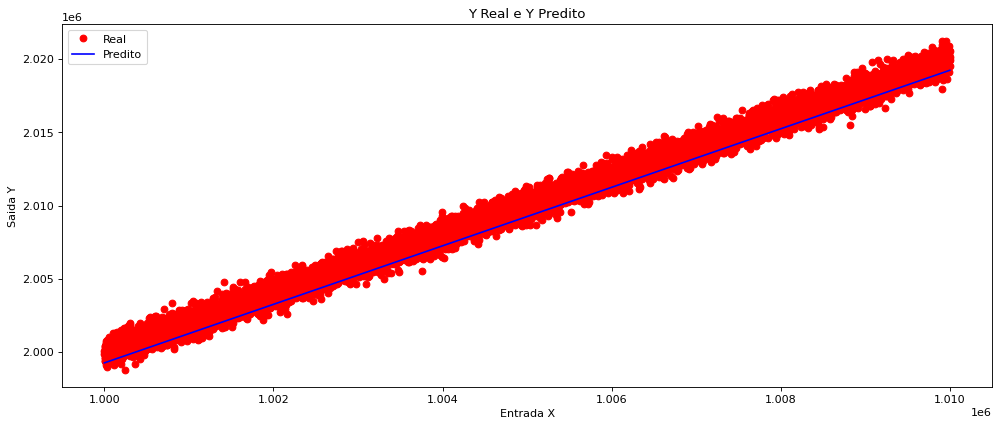

In [152]:
plt.figure(figsize=(15, 6), dpi=80)


#Dados Real
plt.plot(x_test, y_test, 'ro', label = 'Real')
plt.plot(x_test, y_pred,'b-', label = 'Predito')
#Saida Predita
#plt.plot(x_test, y_pred,'b-')
plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

Regressão Linear, y = 2x + k (alto ruido branco)

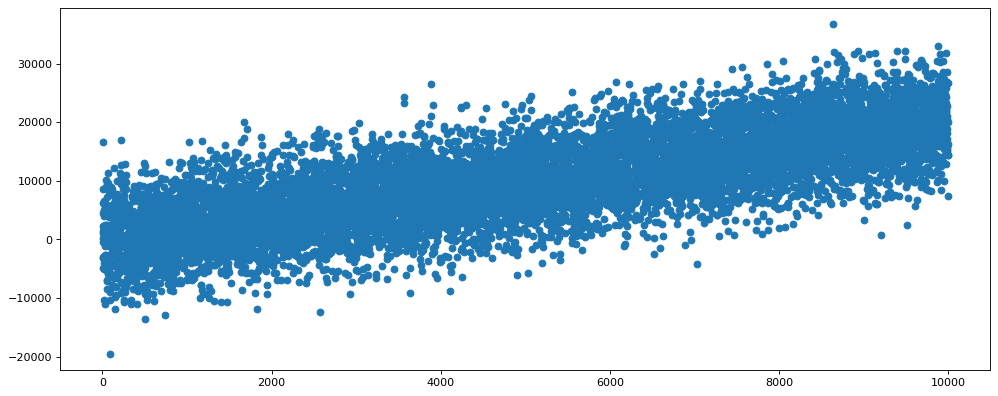

In [162]:
plt.figure(figsize=(15, 6), dpi=80)

x = np.arange(1,10000,1)
y = 2*x + white_noise(5000, x)

plt.scatter(x, y)

In [173]:
model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = np.arange(1e6, 1.01e6, 1)
y_test = 2*x_test + white_noise(5000, x_test)
#print(y_test)

prediction = model.predict(x_test)
#print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

Epoch 1/10
313/313 [==============================] - 1s 943us/step - loss: 163709898.0382 - mae: 10791.8765
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 97430530.3439 - mae: 8199.5023
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 46868014.9427 - mae: 5523.0617
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 27839906.8280 - mae: 4210.2405
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 25335009.7134 - mae: 4033.5115
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 25049834.1783 - mae: 3996.9188
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 24263121.3949 - mae: 3931.0102
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 24931384.9490 - mae: 3989.4382
Epoch 9/10
313/313 [==============================] - 0s 1ms/step - loss: 25999242.1975 - mae: 4064.7726
Epoch 10/10
313/313 [==============================

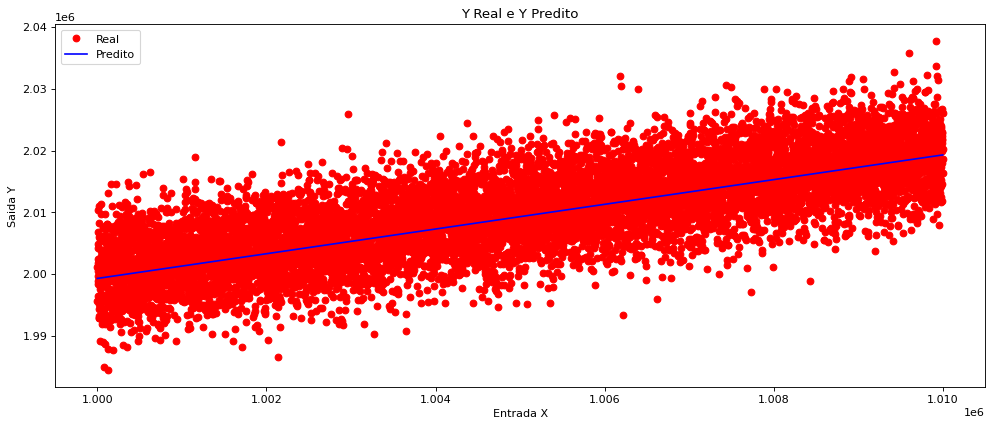

In [174]:
plt.figure(figsize=(15, 6), dpi=80)
#Dados Real
plt.plot(x_test, y_test, 'ro', label = 'Real')
#Saida Predita
plt.plot(x_test, y_pred,'b-', label = 'Predito')

plt.title("Y Real e Y Predito")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.show();

Não linear, y = c1*x1 + c2x2^2 + k(ruido branco mi=0)

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)

x1 = np.arange(1,10000,1)
x2 = np.arange(1,10000,1)

y = 2*x1 + 3*x2**2 + white_noise(1, x1)


<Figure size 1200x480 with 0 Axes>

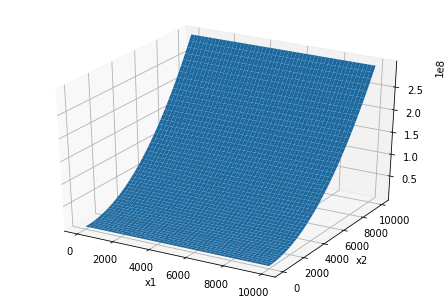

In [181]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15, 6), dpi=80)

'''
b = np.arange(0.2, 3.2, 0.2)
d = np.arange(0.1, 1.0, 0.1)

B, D = np.meshgrid(b, d)
nu = np.sqrt( 1 + (2*D*B)**2 ) / np.sqrt( (1-B**2)**2 + (2*D*B)**2)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(B, D, nu)
plt.xlabel('b')
plt.ylabel('d')
'''

x1 = np.arange(1,10000,1)
x2 = np.arange(1,10000,1)

X1, X2 = np.meshgrid(x1, x2)

y = 2*X1 + 3*X2**2 + white_noise(1, x1)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, y)
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

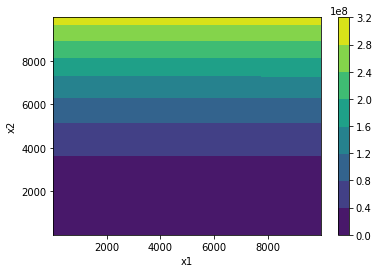

In [182]:
plt.contourf(X1, X2, y)
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# #

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 159.7308 - mae: 159.7308
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 166.2196 - mae: 166.2196
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 152.2548 - mae: 152.2548
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 166.9167 - mae: 166.9167
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 155.9858 - mae: 155.9858
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 166.6274 - mae: 166.6274
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 160.0206 - mae: 160.0206
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 162.7653 - mae: 162.7653
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 160.3779 - mae: 160.3779
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 162.2291 - mae: 162.2291
[2000000.0, 4000000.0]
[[-1221566.4]
 [-2443133. 

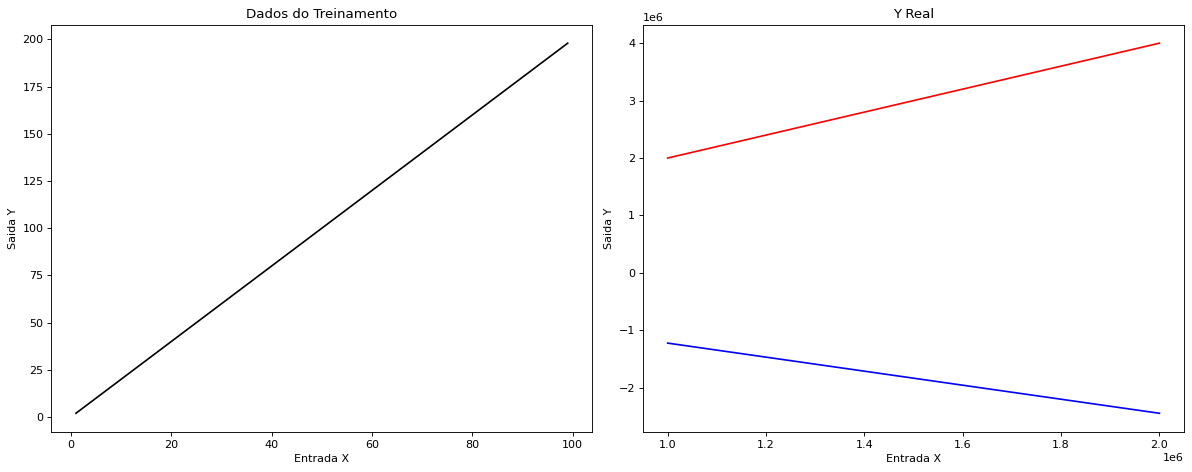

In [ ]:

x = np.arange(1,100,1)
y = np.arange(2,200,2)

model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = [1e6, 2e6]
y_test = [2*x for x in x_test]
print(y_test)

prediction = model.predict(x_test)
print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

plt.figure(figsize=(15, 6), dpi=80)

#Dados de Treinamento
plt.subplot(1, 2, 1)
plt.plot(x, y, 'black')
plt.title("Dados do Treinamento")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
#Dados Real, y = 2x
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'r')
plt.plot(x_test, y_pred,'b')
plt.title("Y Real")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')


plt.tight_layout()

plt.show();

Epoch 1/10
313/313 [==============================] - 1s 954us/step - loss: 8758.1705 - mae: 8758.1705
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 6026.8095 - mae: 6026.8095
Epoch 3/10
313/313 [==============================] - 0s 892us/step - loss: 1495.6025 - mae: 1495.6025
Epoch 4/10
313/313 [==============================] - 0s 939us/step - loss: 1.6514 - mae: 1.6514
Epoch 5/10
313/313 [==============================] - 0s 963us/step - loss: 1.3472 - mae: 1.3472
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 1.2581 - mae: 1.2581
Epoch 7/10
313/313 [==============================] - 0s 1ms/step - loss: 2.0346 - mae: 2.0346
Epoch 8/10
313/313 [==============================] - 0s 1ms/step - loss: 1.3076 - mae: 1.3076
Epoch 9/10
313/313 [==============================] - 0s 915us/step - loss: 1.8312 - mae: 1.8312
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 1.5752 - mae: 1.5752
[2000000.0, 2400000.0

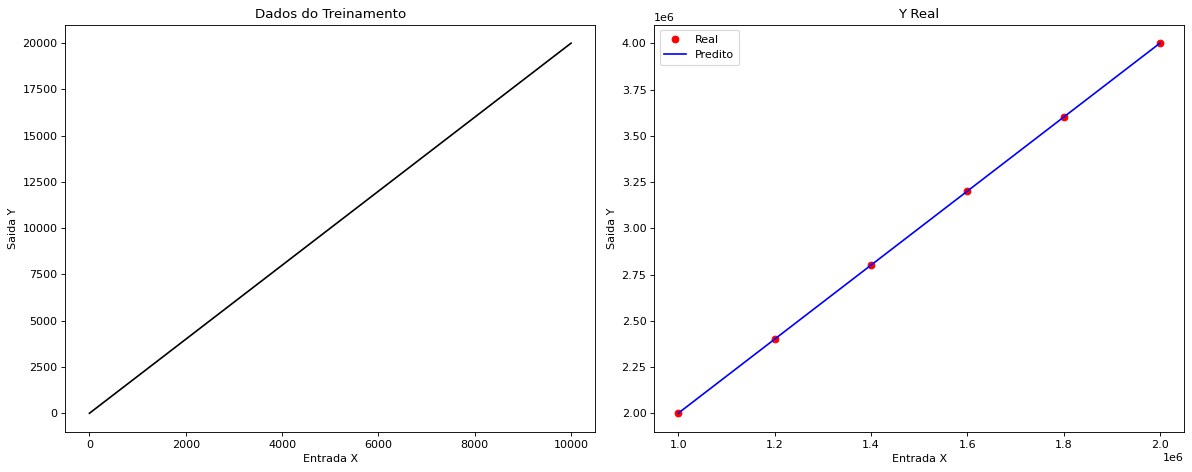

In [ ]:
x = np.arange(1,10000,1)
y = np.arange(2,20000,2)

model = keras.Sequential([layers.Dense(1, activation=None, input_shape = (1,)),    
                          layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae',
                metrics='mae')
model.fit(x, y, epochs=10)

x_test = [1e6, 1.2e6, 1.4e6, 1.6e6, 1.8e6, 2e6]
y_test = [2*x for x in x_test]
print(y_test)

prediction = model.predict(x_test)
print(prediction, end=' ')

prediction = list(prediction)

y_pred = [y for y in prediction]

plt.figure(figsize=(15, 6), dpi=80)

#Dados de Treinamento
plt.subplot(1, 2, 1)
plt.plot(x, y, 'black')
plt.title("Dados do Treinamento")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
#Dados Real, y = 2x
plt.subplot(1, 2, 2)
plt.plot(x_test, y_test, 'ro', label='Real')
plt.plot(x_test, y_pred,'b-', label='Predito')
plt.title("Y Real")
plt.xlabel('Entrada X')
plt.ylabel('Saida Y')
plt.legend()

plt.tight_layout()

plt.show();

### Predição Consumo de Combustível

In [ ]:
#Download do Dataset
download_dataset = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")



32768/30286 [================================] - 0s 1us/step


In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
 
#Leitura do Dataset e armazenamento na variável dados
dados = pd.read_csv(download_dataset, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

#Pré-tratamento de dados faltantes, elimina-os
#dados = dados.dropna()

dados2=dados.copy()
dados2.head()

#Variável Categórica: Origin, converte para one-hot 
origin = dados2.pop('Origin')
dados['USA'] = (origin == 1)*1.0
dados['Europe'] = (origin == 2)*1.0
dados['Japan'] = (origin == 3)*1.0

dados.head()

train_dataset = dados.sample(frac=0.8,random_state=0)
test_dataset = dados.drop(train_dataset.index)


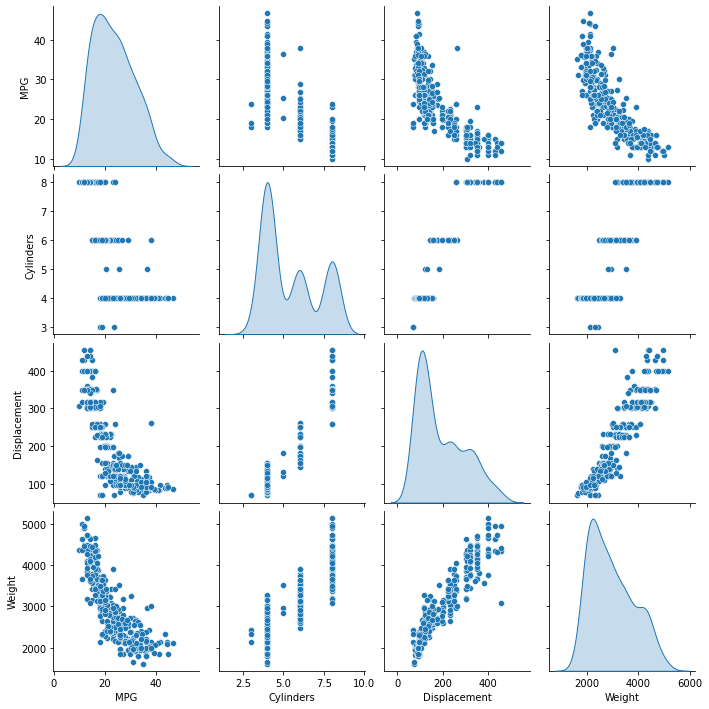

In [ ]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")


In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])


model.summary()
train_labels = train_dataset.pop('MPG')
EPOCHS = 1000

model.fit(train_dataset, train_labels, epochs=1000)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


ValueError: ignored

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

### Predição Preço de Apartamento

In [ ]:
melbourne_data = pd.read_csv('/content/Melbourne_housing_FULL.csv') 
melbourne_data.columns
melbourne_data.head()

y = melbourne_data.Price

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_data[melbourne_features]

melbourne_model = keras.Sequential([layers.Dense(16, activation = 'relu', input_shape=5),
                                    layers.Dense(16, activation = 'relu'),
                                    layers.Dense(1)
])


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])



melbourne_model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])

# Fit model
melbourne_model.fit(X, y, epochs=10)


In [ ]:
melbourne_data = pd.read_csv('/content/Melbourne_housing_FULL.csv') 
melbourne_data.columns
melbourne_data.head()